# Importing Libraries

In [103]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re
iphone_reviews=[]

Extracting reviews from snapdeal website

In [104]:
#Extracting reviews from snapdeal website
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the rev

In [105]:
### Removing repeated reviews
iphone_snapdeal = list(set(iphone_snapdeal))

In [106]:
# Writing reviews into text file
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))


In [107]:
iphone_snapdeal

["D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE",
 'Very good product and delivered in time  as committed; true value for money',
 "Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !",
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [109]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,"[""D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can't say dis is d phone's problem at all. I hv chosen d 8gb phone so it's my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE""",'Very good product and delivered in time as committed; true value for money',"""Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !""",'Pros : Picture quality is awesome,sound with hearing ad is good,look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone,You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars','dream come true','offer product is available,customer care also good',...,'Features are good....but the phone gets heated after some time',"""The OS will take around 5GB","leaving only 3 GB for your files. Unless you're not a heavy files user.""",'Beautiful Product. Original Apple Product and delivery in 2nd day.\nAnd iPhone is iPhone ;-)','Superb model,snapdeal delivered as promised time','This product is awwsum in use... As by looks also.. I would defination prefer this nxt time also','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .','goood.. fast shipping']


In [110]:
#text processing
ip_snapd=' '.join(ip_snapd)
ip_snapd

'["D phone is good. IOS is d best OS.... Safe also. D phone looks great though it consists plastic body. Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks. Its camera is superb. Battery also. Dere is only one problem nd dat is space... Bt I can\'t say dis is d phone\'s problem at all. I hv chosen d 8gb phone so it\'s my flaw. But in 1 word i just can say it is d best phone in dis price. Thumbs up APPLE"  \'Very good product and delivered in time  as committed; true value for money\'  "Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with \'PRIORITY\' mark on the box.... Thanx to snapdeal !"  \'Pros : Picture quality is awesome  sound with hearing ad is good  look and feel is good \\n \\ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone  You have to use some file transfer app like shareit.\\n\\nOther is good. I am new

In [111]:
# Remove Punctuations
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  Very good product and delivered in time  as committed true value for money  Totaly satisfy with the product It is a brand new 100 genuine iphone And got it within 24 hours of ordering Packing was superb with PRIORITY mark on the box Thanx to snapdeal   Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time

In [112]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'D phone is good IOS is d best OS Safe also D phone looks great though it consists plastic body Metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice in looks Its camera is superb Battery also Dere is only one problem nd dat is space Bt I cant say dis is d phones problem at all I hv chosen d 8gb phone so its my flaw But in 1 word i just can say it is d best phone in dis price Thumbs up APPLE  Very good product and delivered in time  as committed true value for money  Totaly satisfy with the product It is a brand new 100 genuine iphone And got it within 24 hours of ordering Packing was superb with PRIORITY mark on the box Thanx to snapdeal   Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time

In [113]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['D', 'phone', 'is', 'good', 'IOS', 'is', 'd', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'it', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'in', 'looks', 'Its', 'camera', 'is', 'superb', 'Battery', 'also', 'Dere', 'is', 'only', 'one', 'problem', 'nd', 'dat', 'is', 'space', 'Bt', 'I', 'cant', 'say', 'dis', 'is', 'd', 'phones', 'problem', 'at', 'all', 'I', 'hv', 'chosen', 'd', '8gb', 'phone', 'so', 'its', 'my', 'flaw', 'But', 'in', '1', 'word', 'i', 'just', 'can', 'say', 'it', 'is', 'd', 'best', 'phone', 'in', 'dis', 'price', 'Thumbs', 'up', 'APPLE', 'Very', 'good', 'product', 'and', 'delivered', 'in', 'time', 'as', 'committed', 'true', 'value', 'for', 'money', 'Totaly', 'satisfy', 'with', 'the', 'product', 'It', 'is', 'a', 'brand', 'new', '100', 'genuine', 'iphone', 'And', 'got', 'it', 'within', '24', 'hours', 'of', 'ordering', 'Packin

In [115]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
# Tokens count
len(text_tokens)

1573

In [117]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['D', 'phone', 'good', 'IOS', 'best', 'OS', 'Safe', 'also', 'D', 'phone', 'looks', 'great', 'though', 'consists', 'plastic', 'body', 'Metal', 'body', 'looks', 'good', 'bt', 'dt', 'nt', 'means', 'plastic', 'body', 'looks', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'looks', 'Its', 'camera', 'superb', 'Battery', 'also', 'Dere', 'one', 'problem', 'nd', 'dat', 'space', 'Bt', 'cant', 'say', 'dis', 'phones', 'problem', 'hv', 'chosen', '8gb', 'phone', 'flaw', 'But', '1', 'word', 'say', 'best', 'phone', 'dis', 'price', 'Thumbs', 'APPLE', 'Very', 'good', 'product', 'delivered', 'time', 'committed', 'true', 'value', 'money', 'Totaly', 'satisfy', 'product', 'It', 'brand', 'new', '100', 'genuine', 'iphone', 'And', 'got', 'within', '24', 'hours', 'ordering', 'Packing', 'superb', 'PRIORITY', 'mark', 'box', 'Thanx', 'snapdeal', 'Pros', 'Picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'You', 'transfer', 'files', 'using', 'bluetooth', 'andrio

In [118]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'you', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'stars', 'dream', 'come', 'true', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'the', '5c', 'delivered', 'sealed', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'the', 'product', 'quality', 'good', 'thing', 'memory', 'capacity', 'sufficient', 'storing', 'data', 'really', 'happy', 'product', 'servicealways', 'best', 'the', 'product', 'supplied']


In [119]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['awesom', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphon', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnoth', 'good', 'new', 'iphon', 'till', 'itnniphon', '5c', 'snapdeal', 'time', 'deliveri', '4', 'star', 'dream', 'come', 'true', 'offer', 'product', 'avail', 'custom', 'care', 'also', 'good', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'simpl', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'the', '5c', 'deliv', 'seal', 'box', 'crisp', 'brand', 'new', 'super', 'deal', 'the', 'product', 'qualiti', 'good', 'thing', 'memori', 'capac', 'suffici', 'store', 'data', 'realli', 'happi', 'product', 'servicealway', 'best', 'the', 'product', 'suppli']


In [120]:
!pip3 install en_core_web_sm
!python -m spacy download %


✘ No compatible package found for '%' (spaCy v3.7.4)



In [121]:

# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

d phone good ios best os safe also d phone looks great though consists plastic body metal body looks good bt dt nt means plastic body looks cheap plastic may also b nice looks its camera superb battery also dere one problem nd dat space bt cant say dis phones problem hv chosen 8gb phone flaw but 1 word say best phone dis price thumbs apple very good product delivered time committed true value money totaly satisfy product it brand new 100 genuine iphone and got within 24 hours ordering packing superb priority mark box thanx snapdeal pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 stars dream come true offer product available customer care also good good price great seller genuine product fast shipping recommended simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagg

In [122]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['d', 'phone', 'good', 'io', 'good', 'os', 'safe', 'also', 'd', 'phone', 'look', 'great', 'though', 'consist', 'plastic', 'body', 'metal', 'body', 'look', 'good', 'bt', 'dt', 'not', 'mean', 'plastic', 'body', 'look', 'cheap', 'plastic', 'may', 'also', 'b', 'nice', 'look', 'its', 'camera', 'superb', 'battery', 'also', 'dere', 'one', 'problem', 'nd', 'dat', 'space', 'bt', 'can', 'not', 'say', 'dis', 'phone', 'problem', 'hv', 'choose', '8', 'gb', 'phone', 'flaw', 'but', '1', 'word', 'say', 'good', 'phone', 'dis', 'price', 'thumb', 'apple', 'very', 'good', 'product', 'deliver', 'time', 'commit', 'true', 'value', 'money', 'totaly', 'satisfy', 'product', 'it', 'brand', 'new', '100', 'genuine', 'iphone', 'and', 'get', 'within', '24', 'hour', 'order', 'pack', 'superb', 'priority', 'mark', 'box', 'thanx', 'snapdeal', 'pro', 'picture', 'quality', 'awesome', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow'

In [123]:
clean_comments=' '.join(lemmas)
clean_comments

'd phone good io good os safe also d phone look great though consist plastic body metal body look good bt dt not mean plastic body look cheap plastic may also b nice look its camera superb battery also dere one problem nd dat space bt can not say dis phone problem hv choose 8 gb phone flaw but 1 word say good phone dis price thumb apple very good product deliver time commit true value money totaly satisfy product it brand new 100 genuine iphone and get within 24 hour order pack superb priority mark box thanx snapdeal pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star dream come true offer product available customer care also good good price great seller genuine product fast shipping recommend simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable bus

# Feature Extaction
1. Using CountVectorizer

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [125]:
print(cv.vocabulary_)

{'phone': 244, 'good': 143, 'io': 169, 'os': 233, 'safe': 296, 'also': 21, 'look': 191, 'great': 147, 'though': 363, 'consist': 75, 'plastic': 249, 'body': 45, 'metal': 204, 'bt': 49, 'dt': 108, 'not': 222, 'mean': 200, 'cheap': 62, 'may': 199, 'nice': 220, 'its': 179, 'camera': 55, 'superb': 346, 'battery': 38, 'dere': 98, 'one': 226, 'problem': 261, 'nd': 214, 'dat': 87, 'space': 338, 'can': 56, 'say': 302, 'dis': 99, 'hv': 163, 'choose': 64, 'gb': 138, 'flaw': 133, 'but': 53, 'word': 402, 'price': 255, 'thumb': 365, 'apple': 28, 'very': 390, 'product': 263, 'deliver': 95, 'time': 367, 'commit': 69, 'true': 376, 'value': 388, 'money': 207, 'totaly': 373, 'satisfy': 301, 'it': 176, 'brand': 48, 'new': 218, '100': 1, 'genuine': 139, 'iphone': 172, 'and': 24, 'get': 140, 'within': 399, '24': 5, 'hour': 161, 'order': 231, 'pack': 235, 'priority': 258, 'mark': 197, 'box': 47, 'thanx': 354, 'snapdeal': 332, 'pro': 260, 'picture': 247, 'quality': 276, 'awesome': 33, 'sound': 337, 'hear': 15

In [126]:
feature_names=cv.get_feature_names_out()
print(feature_names)

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge' 'cheap'
 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit' 'compare'
 'competitive' 'con' 'condition' 'conditionnno' 'consist' 'contact' 'cool'
 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit' 'crisp' 'customer'
 'damage' 'dat' 'datum' 'day' 'daynand' 'deal' 'dear' 'decide'
 'defination' 'deliver' 'delivery' 'delivry' 'dere' 'dis' 'discount'
 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull' 'dream'
 'dt' 'due' 'earn' '

In [127]:
print(cv.get_feature_names_out()[100:200])

['discount' 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull'
 'dream' 'dt' 'due' 'earn' 'easy' 'eliveryi' 'emi' 'essy' 'even' 'ever'
 'everyone' 'everything' 'excellent' 'expectation' 'experience' 'fake'
 'family' 'fast' 'feature' 'feel' 'file' 'fill' 'find' 'finger' 'first'
 'five' 'flaw' 'fraudulent' 'free' 'friend' 'fully' 'gb' 'genuine' 'get'
 'gift' 'go' 'good' 'goodbut' 'goood' 'grand' 'great' 'guess' 'hahahaha'
 'hang' 'happy' 'happyalso' 'have' 'headphone' 'hear' 'heated' 'heavy'
 'hesitate' 'honest' 'honestly' 'hour' 'however' 'hv' 'in' 'initially'
 'inter' 'interaction' 'interest' 'io' 'ios' 'ios9' 'iphone' 'iphone5c'
 'iphoneearli' 'issue' 'it' 'item' 'itnniphone' 'its' 'job' 'lack' 'lag'
 'lagging' 'late' 'leave' 'level' 'like' 'limit' 'listnnapple' 'little'
 'look' 'love' 'lovely' 'low' 'make' 'manufacturer' 'mark' 'marvallous'
 'may']


In [128]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [129]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [130]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['100' '5c' 'also' 'amazing' 'and' 'android' 'apple' 'awesome' 'body'
 'budget' 'but' 'buy' 'camera' 'can' 'cheap' 'condition' 'day' 'deal'
 'deliver' 'delivery' 'do' 'even' 'excellent' 'experience' 'fast'
 'feature' 'feel' 'file' 'fill' 'first' 'free' 'gb' 'genuine' 'get' 'go'
 'good' 'great' 'happy' 'io' 'iphone' 'issue' 'it' 'its' 'late' 'like'
 'look' 'low' 'memory' 'mobile' 'money' 'must' 'need' 'new' 'nice' 'not'
 'one' 'order' 'original' 'overall' 'pack' 'perfect' 'perform'
 'performance' 'phone' 'plastic' 'price' 'problem' 'product' 'provide'
 'quality' 'really' 'receive' 'recommend' 'satisfied' 'seller' 'service'
 'shipping' 'shop' 'site' 'snap' 'snapdeal' 'so' 'space' 'superb' 'take'
 'thank' 'the' 'this' 'though' 'till' 'time' 'use' 'value' 'very' 'want'
 'within' 'worth' 'would' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 3. TF-IDF Vectorizer

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [132]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matix_ngram.toarray())

['10' '100' '1000rs' '2030' '20k' '24' '2nd' '5c' '5cnnsnapdeal' '6s'
 '9nncons' 'absolutly' 'accessory' 'account' 'action' 'ad' 'adorable'
 'affordable' 'after' 'almost' 'already' 'also' 'always' 'amazing' 'and'
 'andriodblackberrywindow' 'android' 'app' 'apple' 'around' 'as'
 'attractive' 'available' 'awesome' 'awesum' 'awsme' 'awwsum' 'back'
 'battery' 'be' 'beatifully' 'beautiful' 'believe' 'bit' 'bluetooth'
 'body' 'bodyn2' 'box' 'brand' 'bt' 'budget' 'build' 'business' 'but'
 'buy' 'camera' 'can' 'capacity' 'care' 'category' 'cell' 'charge' 'cheap'
 'choice' 'choose' 'class' 'close' 'colour' 'come' 'commit' 'compare'
 'competitive' 'con' 'condition' 'conditionnno' 'consist' 'contact' 'cool'
 'costly' 'coupon' 'courier' 'cr' 'crazy' 'credit' 'crisp' 'customer'
 'damage' 'dat' 'datum' 'day' 'daynand' 'deal' 'dear' 'decide'
 'defination' 'deliver' 'delivery' 'delivry' 'dere' 'dis' 'discount'
 'dispatchnprosn1' 'display' 'do' 'doubt' 'doubted' 'doubtfull' 'dream'
 'dt' 'due' 'earn' '

# Generate word cloud

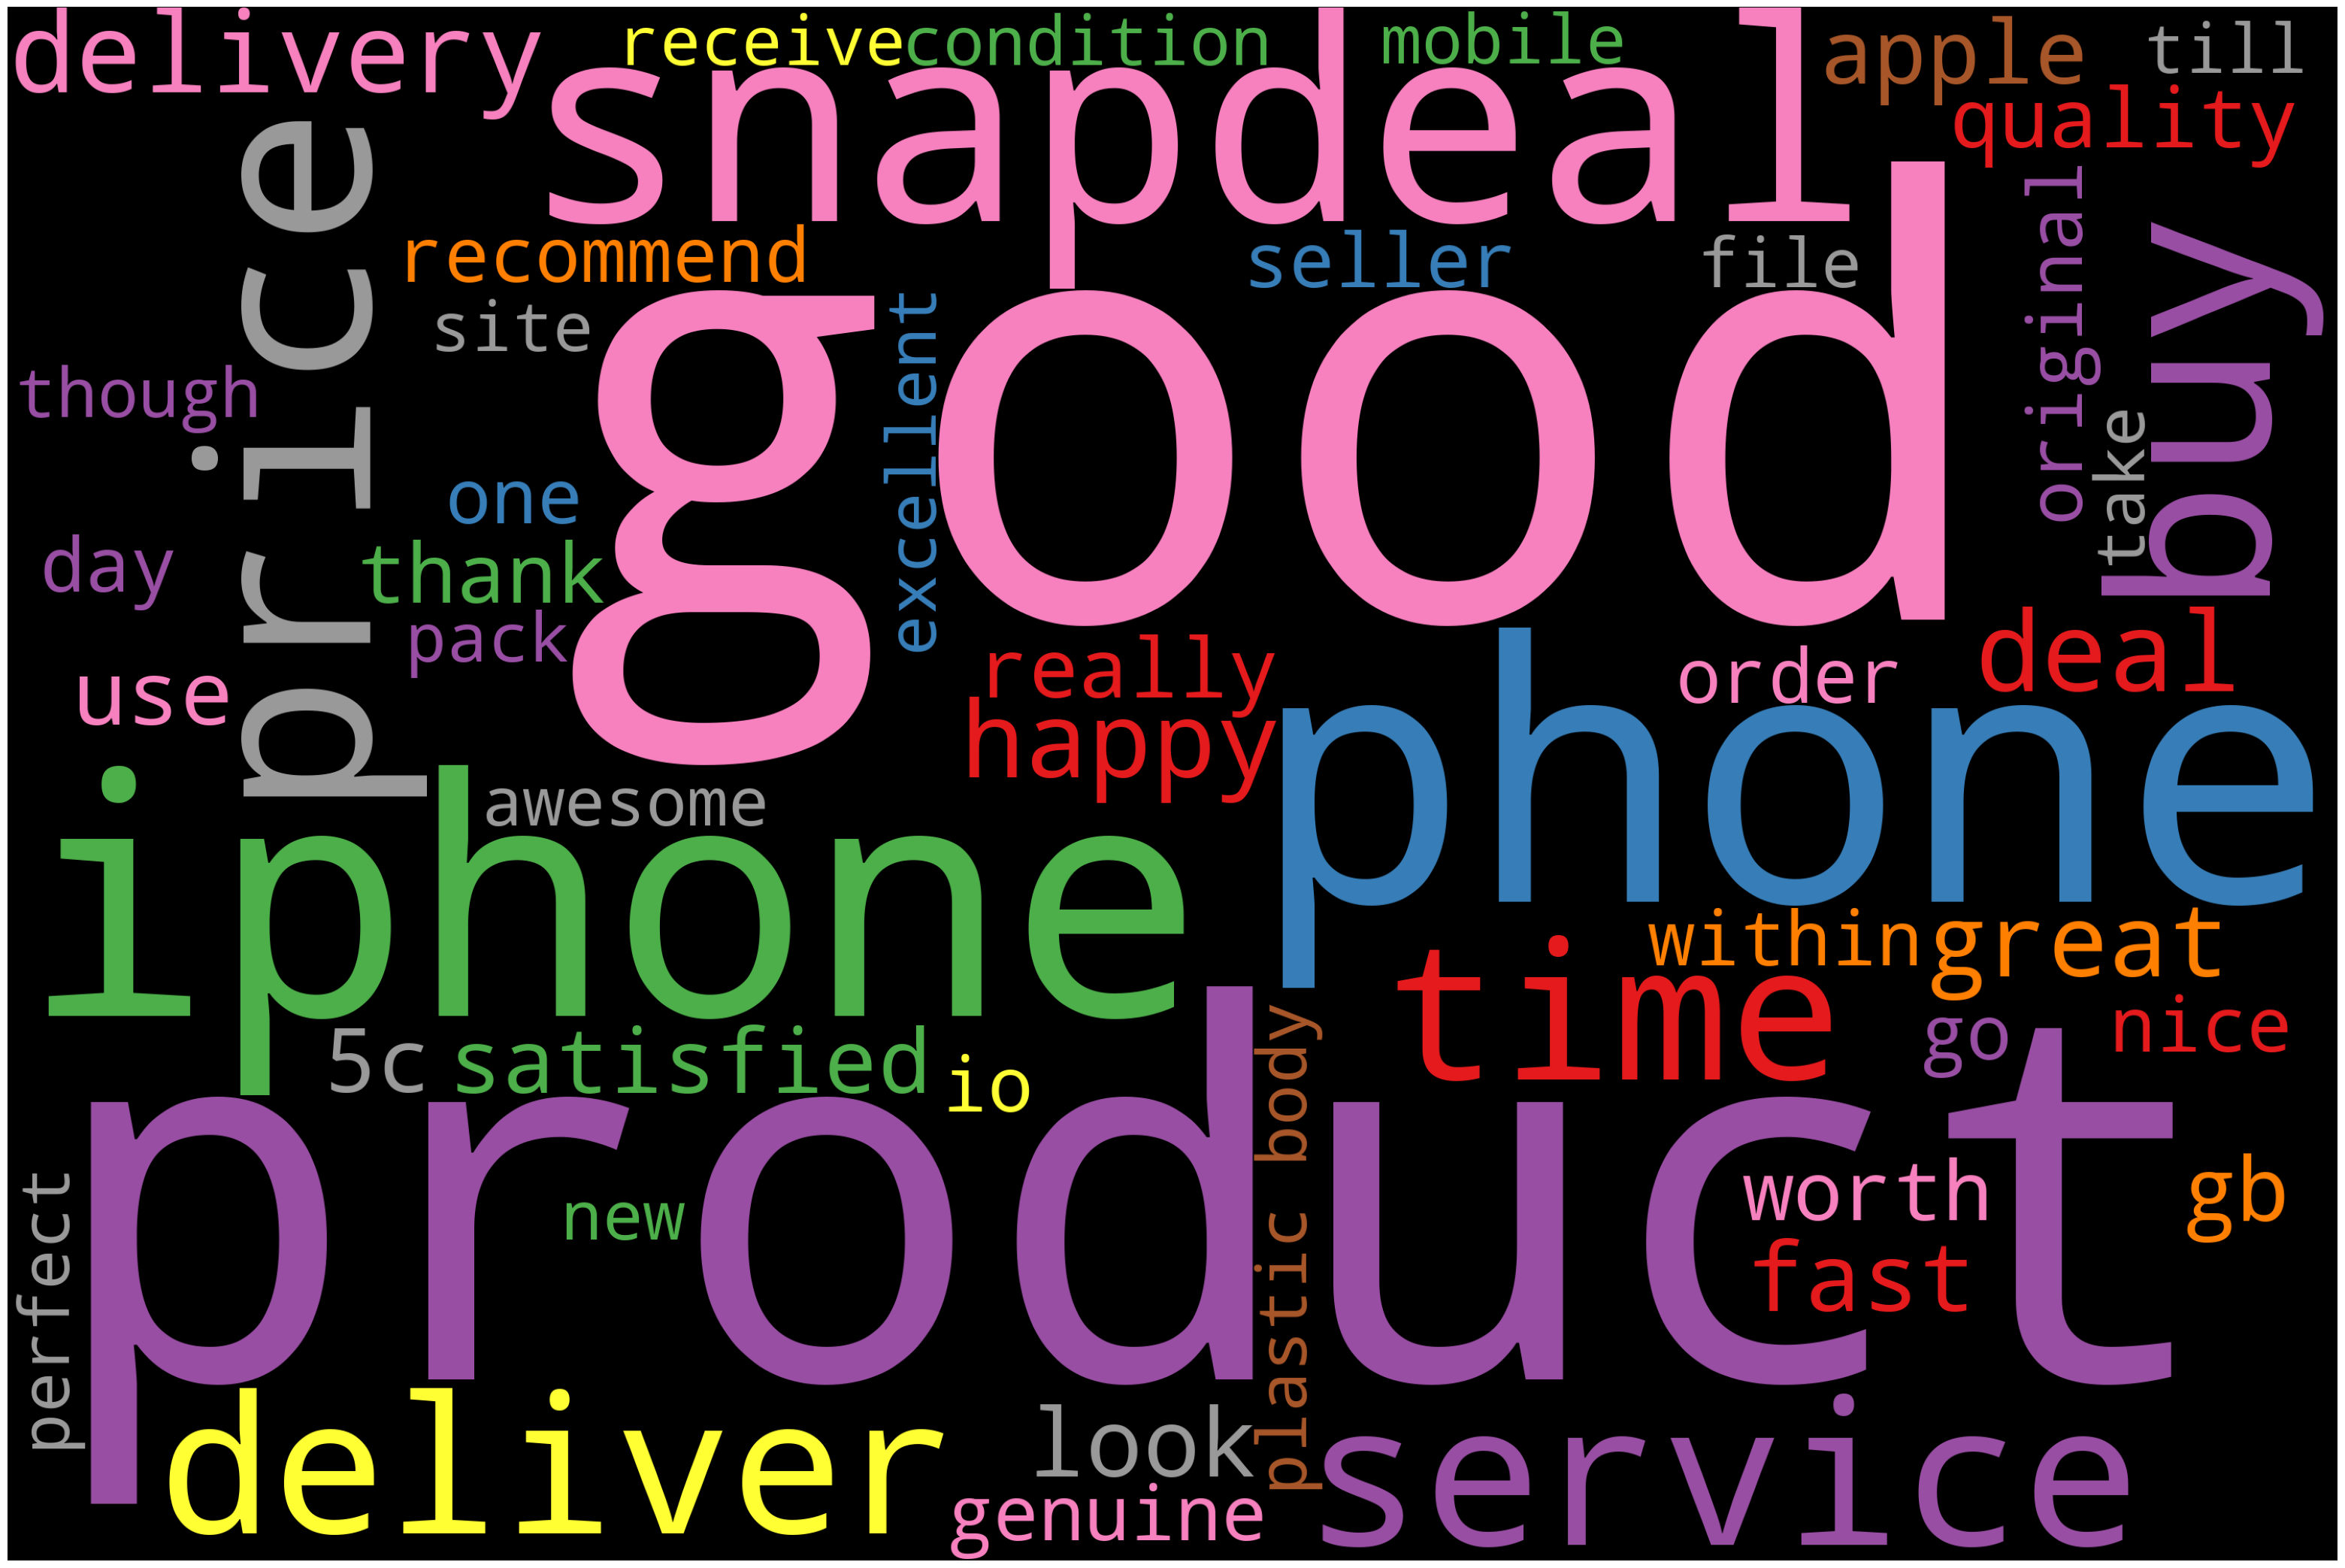

In [133]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [134]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [135]:
for token in doc_block[100:200]:
    print(token,token.pos_)

picture NOUN
quality NOUN
awesome ADJ
sound NOUN
hear VERB
ad NOUN
good ADJ
look NOUN
feel VERB
good ADJ
n NOUN
ncon NOUN
you PRON
transfer VERB
file NOUN
use VERB
bluetooth PRON
andriodblackberrywindow NOUN
iphone NOUN
you PRON
use VERB
file NOUN
transfer NOUN
app NOUN
like ADP
shareitnnother NOUN
good ADJ
new ADJ
iphone NOUN
till SCONJ
itnniphone NOUN
5c NUM
snapdeal ADJ
time NOUN
delivery NOUN
4 NUM
star NOUN
dream NOUN
come VERB
true ADJ
offer NOUN
product NOUN
available ADJ
customer NOUN
care NOUN
also ADV
good ADJ
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
simple ADJ
nall NOUN
thing NOUN
u PROPN
need VERB
ni PROPN
buy VERB
2 NUM
year NOUN
snapdeal NOUN
still ADV
perfect VERB
conditionnno ADJ
lagging NOUN
till SCONJ
todaynsuitable ADJ
business NOUN
need VERB
the DET
5c PROPN
deliver VERB
seal NOUN
box NOUN
crisp PROPN
brand PROPN
new ADJ
super ADJ
deal NOUN
the DET
product NOUN
quality NOUN
good ADJ
thing NOUN
memory NO

In [136]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['deal', 'product', 'quality', 'thing', 'memory', 'capacity', 'store', 'product', 'servicealway', 'product', 'supply', 'price', 'show', 'get', 'ths', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'earn', 'trust', 'get', 'discount', 'phone', 'wife', 'want', 'try', 'iphone', 'love', 'iphone', 'buy', 'use', 'year', 'performance', 'think', 'go', 'iphone', 'want', 'go', 'iphone', 'decide', 'buy', 'iphone', '5cnnsnapdeal', 'provide', 'deal', 'compare', 'site', 'delivery', 'prompt', 'phone', 'look', 'lag', 'headphone', 'upgrade', 'plastic', 'body', 'mobile', 'memory', 'fill', 'gb', 'limit', 'productthank', 'seller', 'deliver', 'phone', 'experience', 'iphone', 'delivery', 'expectation', 'product', 'buy', 'phone', 'delivery', 'snap', 'deal', 'speak', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'product', 'quality', 'product', 'recommend', 'friend', 'family', 'member']


In [137]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,product,40
1,phone,28
2,iphone,25
3,price,17
4,buy,15
5,service,12
6,deliver,11
7,time,11
8,delivery,11
9,deal,11


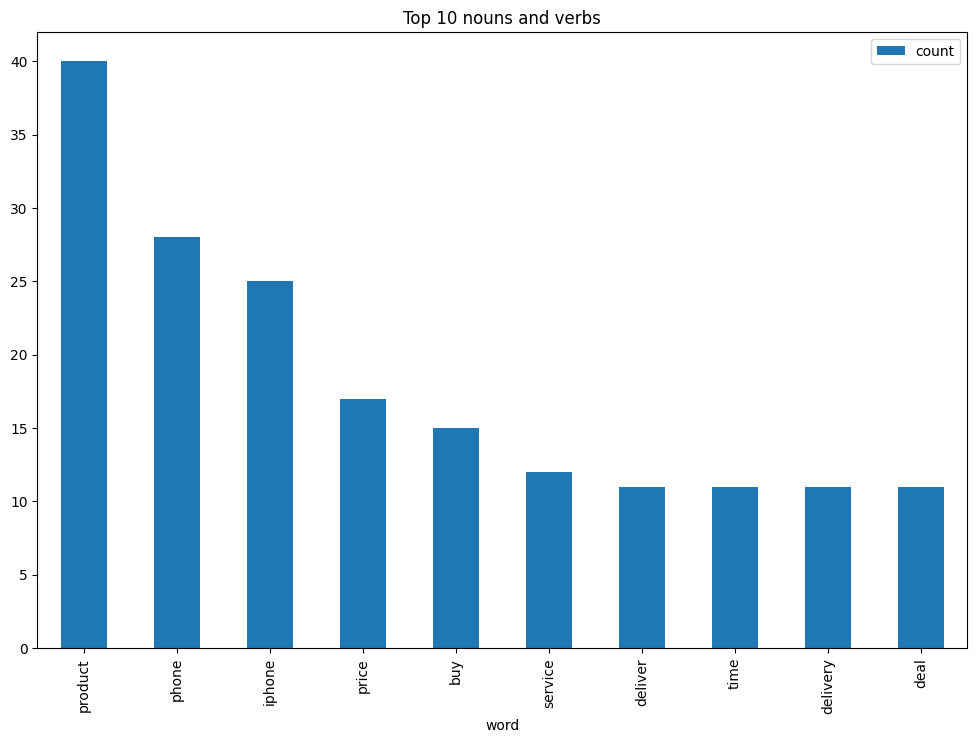

In [138]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [139]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

NameError: name 'tweets' is not defined

In [140]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Apple is looking at buying U.K. startup for $1...
1,Autonomous cars shift insurance liability towa...
2,San Francisco considers banning sidewalk deliv...
3,London is a big city in the United Kingdom.
4,Where are you?
5,Who is the president of France?
6,What is the capital of the United States?
7,When was Barack Obama born?


In [142]:
# Emotion Lexicon - Affin
affin=pd.read_csv('/content/AFINN1.csv',sep=',',encoding='Latin-1')
affin

,Word,Value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [145]:
affinity_scores=affin.set_index('Word')['Value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [146]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [147]:
# manual testing
calculate_sentiment(text='great')

3

In [148]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0    0
1    0
2   -2
3    1
4    0
5    0
6    0
7    0
Name: sentiment_value, dtype: int64

In [149]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0    10
1     7
2     7
3     9
4     3
5     6
6     8
7     5
Name: word_count, dtype: int64

In [150]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
2,San Francisco considers banning sidewalk deliv...,-2,7
0,Apple is looking at buying U.K. startup for $1...,0,10
1,Autonomous cars shift insurance liability towa...,0,7
4,Where are you?,0,3
5,Who is the president of France?,0,6
6,What is the capital of the United States?,0,8
7,When was Barack Obama born?,0,5
3,London is a big city in the United Kingdom.,1,9


In [151]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    8.000000
mean    -0.125000
std      0.834523
min     -2.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
Name: sentiment_value, dtype: float64

In [152]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Apple is looking at buying U.K. startup for $1...,0,10
1,Autonomous cars shift insurance liability towa...,0,7
2,San Francisco considers banning sidewalk deliv...,-2,7
4,Where are you?,0,3
5,Who is the president of France?,0,6
6,What is the capital of the United States?,0,8
7,When was Barack Obama born?,0,5


In [153]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
3,London is a big city in the United Kingdom.,1,9


In [154]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Apple is looking at buying U.K. startup for $1...,0,10,0
1,Autonomous cars shift insurance liability towa...,0,7,1
2,San Francisco considers banning sidewalk deliv...,-2,7,2
3,London is a big city in the United Kingdom.,1,9,3
4,Where are you?,0,3,4
5,Who is the president of France?,0,6,5
6,What is the capital of the United States?,0,8,6
7,When was Barack Obama born?,0,5,7


<ipython-input-155-aa15d41db3a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

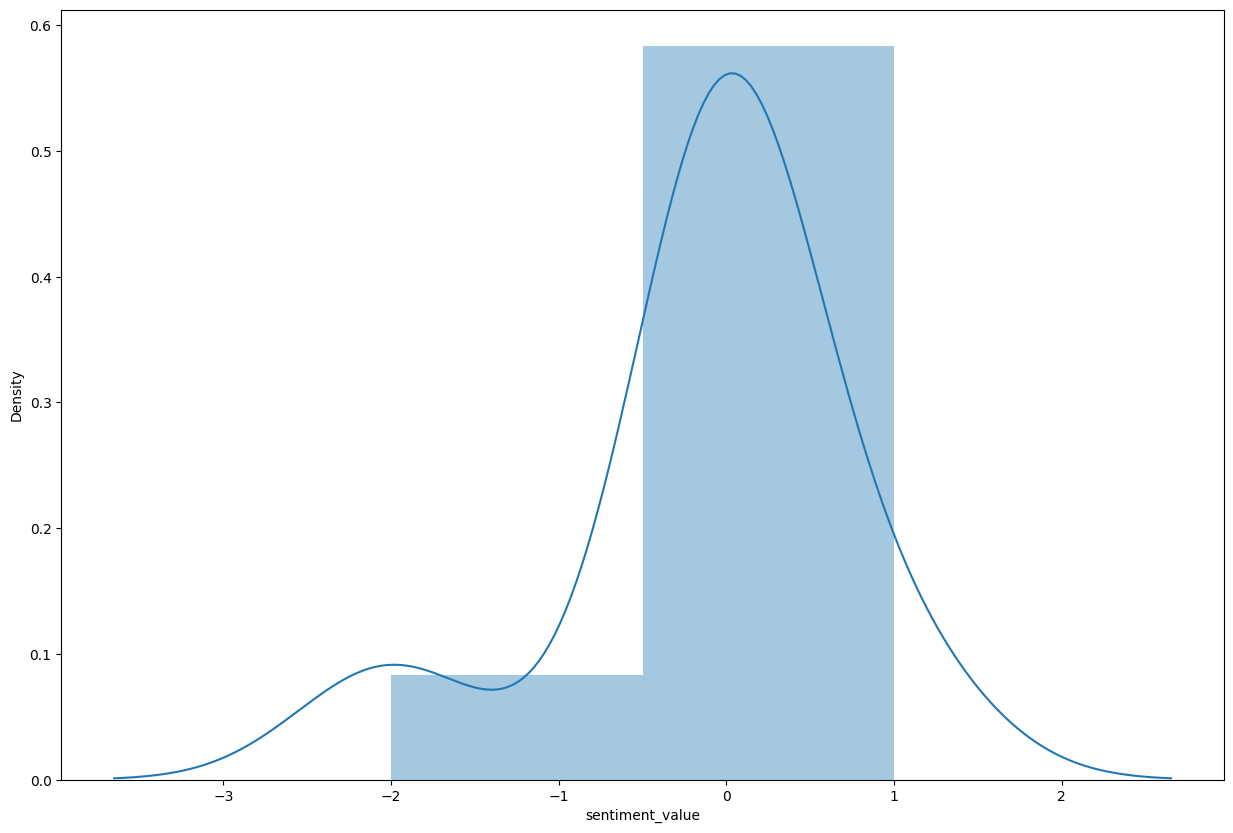

In [155]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

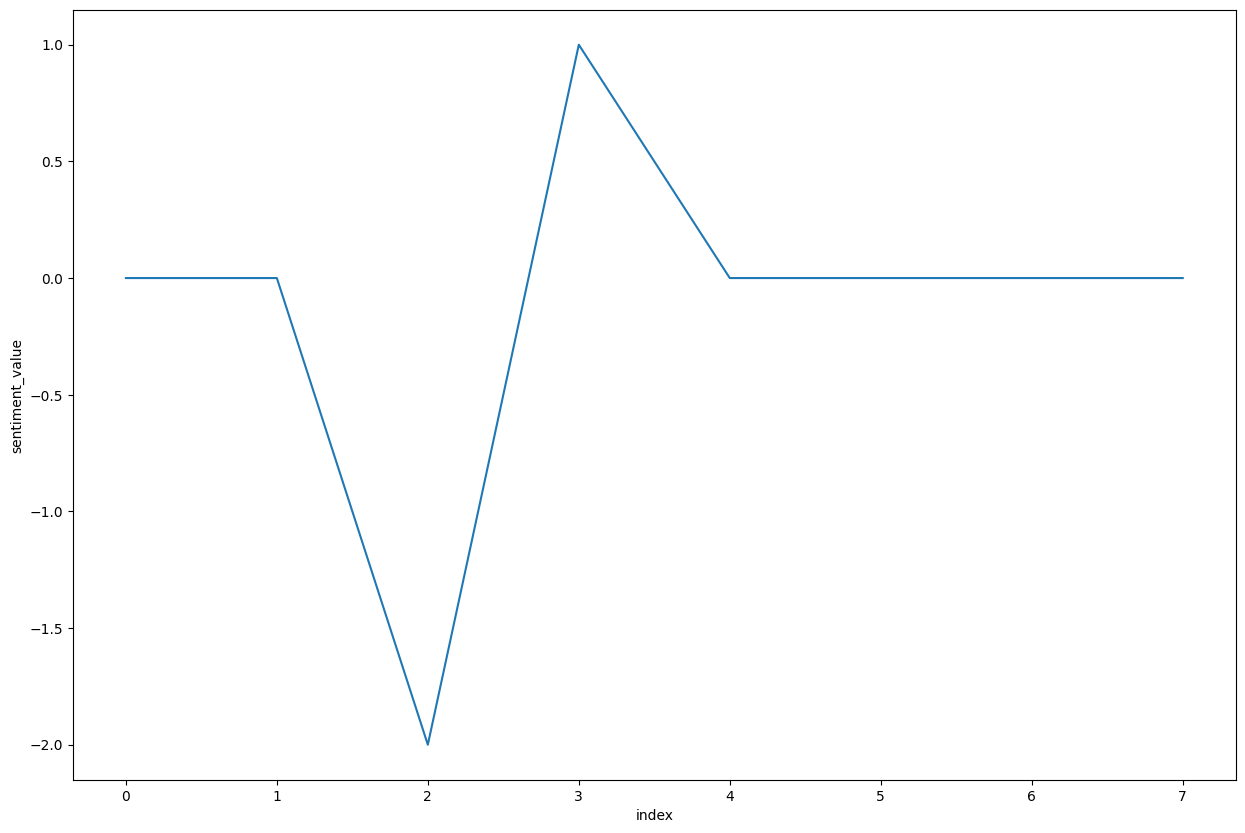

In [156]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

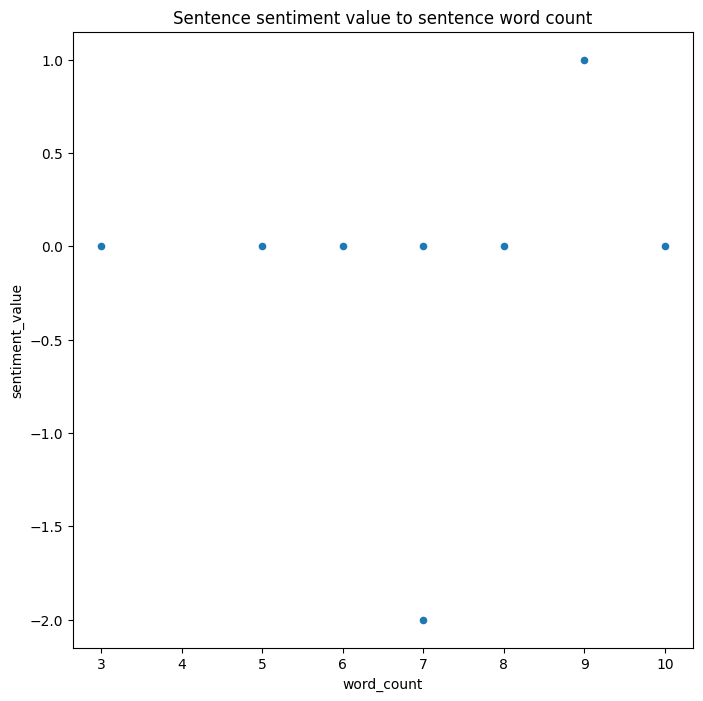

In [157]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')